<a href="https://colab.research.google.com/github/mo-karbalaee/movement_neuroscience/blob/main/MN_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 0. Dataset Preparation

In [349]:
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt

In [350]:
fl_plot_color = "#2ca02c"
ex_plot_color = "#d62728"

In [351]:
raw_dataset_path = '/content/wrist_flexion_extension.mat'

mat = scipy.io.loadmat(raw_dataset_path)

print(type(mat))
print(mat.keys())

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'EMG_raw_ex', 'EMG_raw_fl', 'force_ex', 'force_fl', 'fsamp'])


In [352]:
EMG_raw_ex = mat["EMG_raw_ex"]
df_EMG_ex = pd.DataFrame(EMG_raw_ex)
EMG_raw_fl = mat["EMG_raw_fl"]
df_EMG_fl = pd.DataFrame(EMG_raw_fl)
force_ex = mat["force_ex"]
df_force_ex = pd.DataFrame(force_ex, columns=["force_ex"])
force_fl = mat["force_fl"]
df_force_fl = pd.DataFrame(force_fl, columns=["force_fl"])
fsamp = float(mat["fsamp"][0, 0])

In [353]:
df_ex = pd.DataFrame(EMG_raw_ex.T, columns=[f"EMG {i+1}" for i in range(32)])
df_ex["force"] = force_ex
df_ex

,EMG 1,EMG 2,EMG 3,EMG 4,EMG 5,EMG 6,EMG 7,EMG 8,EMG 9,EMG 10,...,EMG 24,EMG 25,EMG 26,EMG 27,EMG 28,EMG 29,EMG 30,EMG 31,EMG 32,force
0,-0.004864,0.002575,0.003147,0.005722,0.004005,0.002003,0.006294,0.006294,0.013447,0.000572,...,0.011730,0.013733,0.012589,0.014305,0.018883,0.023460,0.019741,-0.019455,-0.010586,-0.006367
1,-0.002861,0.003147,0.006866,0.009441,0.007153,0.004005,0.011444,0.008583,0.011730,0.000858,...,0.011444,0.016022,0.016022,0.020313,0.021172,0.023174,0.016308,-0.033760,-0.015163,-0.006977
2,-0.003719,0.005722,0.009155,0.010872,0.006580,0.005722,0.010872,0.008869,0.015450,0.016022,...,0.012302,0.018311,0.019169,0.023460,0.024033,0.023174,0.017166,-0.036907,-0.019169,-0.006672
3,-0.009155,0.000572,0.001144,0.002575,0.000858,0.000000,0.001717,0.002289,0.004578,0.006294,...,0.007153,0.011730,0.012589,0.016594,0.022030,0.018024,0.010300,-0.042343,-0.027466,-0.006062
4,-0.014305,-0.010300,-0.008583,-0.007153,-0.009155,-0.006294,-0.006580,-0.005436,-0.000572,0.000000,...,0.001431,0.004578,0.003433,0.004864,0.014305,0.013161,0.004005,-0.039482,-0.030899,-0.007587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56745,0.012016,0.005436,0.005436,0.004864,0.004005,0.001144,0.002003,0.001431,0.006866,-0.001144,...,0.005150,0.008297,0.007725,0.008011,0.018311,0.012875,0.012875,0.031471,0.018597,0.014068
56746,0.014877,0.012589,0.010872,0.007725,0.006866,0.008297,0.003719,0.002861,0.000000,0.004005,...,0.005150,0.008869,0.006866,0.009441,0.020599,0.016022,0.018597,0.034904,0.023460,0.014983
56747,0.021172,0.020313,0.014305,0.009727,0.011158,0.012302,0.008011,0.005436,0.001717,0.004578,...,0.007439,0.008297,0.007439,0.010014,0.021744,0.018883,0.019455,0.035191,0.026321,0.014068
56748,0.027180,0.022888,0.018024,0.017452,0.015450,0.015163,0.011730,0.010300,0.012302,0.016022,...,0.013733,0.013447,0.013161,0.012016,0.026321,0.022602,0.020885,0.034904,0.026894,0.014373


In [354]:
df_fl = pd.DataFrame(EMG_raw_fl.T, columns=[f"EMG {i+1}" for i in range(32)])
df_fl["force"] = force_fl
df_fl

,EMG 1,EMG 2,EMG 3,EMG 4,EMG 5,EMG 6,EMG 7,EMG 8,EMG 9,EMG 10,...,EMG 24,EMG 25,EMG 26,EMG 27,EMG 28,EMG 29,EMG 30,EMG 31,EMG 32,force
0,0.006294,0.006008,-0.002861,-0.011730,-0.019741,-0.001431,0.008011,0.010872,0.006866,0.004864,...,0.008869,0.008297,0.012875,0.014019,0.009155,-0.003433,0.004864,0.005722,0.002289,0.001665
1,-0.001431,0.000000,-0.012875,-0.027466,-0.018597,-0.004005,0.003147,0.008583,-0.000572,-0.028610,...,0.005436,0.005722,0.008583,0.009727,0.004578,-0.002575,0.003719,0.004578,-0.001717,0.000293
2,0.002003,0.003147,-0.014019,-0.032330,-0.009727,0.008297,0.006580,0.012016,-0.001144,-0.024605,...,0.006580,0.005436,0.006008,0.007725,0.001144,-0.000286,0.004864,0.001431,-0.003433,0.002275
3,-0.000286,0.001144,-0.016308,-0.030613,0.000000,0.009155,0.010586,0.012875,-0.004005,-0.031757,...,0.010014,0.006008,0.009155,0.006866,0.003433,0.005436,0.009441,0.000858,-0.004578,0.000598
4,0.013447,0.014877,-0.002575,-0.021744,0.013161,0.023460,0.026035,0.028610,0.007439,-0.014591,...,0.019741,0.017166,0.021458,0.021458,0.017166,0.021172,0.023460,0.012589,0.003433,-0.000165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,0.050354,0.041485,0.046921,0.040340,0.034618,0.030327,0.020313,0.013733,0.000858,0.021744,...,0.018883,0.015736,0.025463,0.046635,0.063229,0.061226,0.030041,0.055218,0.046921,-0.000012
54996,0.032902,0.040913,0.042057,0.021744,0.040340,0.028610,0.020599,0.012875,0.002575,0.002003,...,0.016880,0.010872,0.017738,0.031757,0.053501,0.099277,0.056934,0.046349,0.041771,0.000293
54997,0.020313,0.029469,0.030899,0.000572,0.042057,0.024891,0.013161,0.009441,-0.006294,-0.011730,...,0.012302,0.004864,0.006294,0.020599,0.046921,0.184250,0.129890,0.036335,0.027752,0.000293
54998,0.007439,0.016594,0.015736,-0.012875,0.037479,0.017166,0.008011,0.005436,-0.011444,-0.014877,...,0.008011,0.002861,0.008011,0.022602,0.055218,0.249767,0.194836,0.028610,0.017166,0.000445


# Task 1. Data preprocessing & visualisation

## 1.1 Convert the force transducer signal to Newtons


In [355]:
gravity = 9.81
conversion_factor = 0.1

In [356]:
col_force_fl = df_fl["force"]
col_force_fl = (col_force_fl * gravity) / conversion_factor

print(col_force_fl)

df_fl["force"] = col_force_fl

0        0.163366
1        0.028724
2        0.223207
3        0.058644
4       -0.016157
           ...   
54995   -0.001197
54996    0.028724
54997    0.028724
54998    0.043684
54999    0.058644
Name: force, Length: 55000, dtype: float32


In [357]:
col_force_ex = df_ex["force"]
col_force_ex = (col_force_ex * gravity) / conversion_factor

print(col_force_ex)

df_ex["force"] = col_force_ex

0       -0.624620
1       -0.684461
2       -0.654541
3       -0.594700
4       -0.744302
           ...   
56745    1.380053
56746    1.469815
56747    1.380053
56748    1.409974
56749    1.350133
Name: force, Length: 56750, dtype: float32


## 1.2 Plot the force signal

In [358]:
force_fl_absolute = df_fl["force"].abs()
force_ex_absolute = df_ex["force"].abs()

time_fl = np.arange(len(force_fl_absolute)) / fsamp
time_ex = np.arange(len(force_ex_absolute)) / fsamp

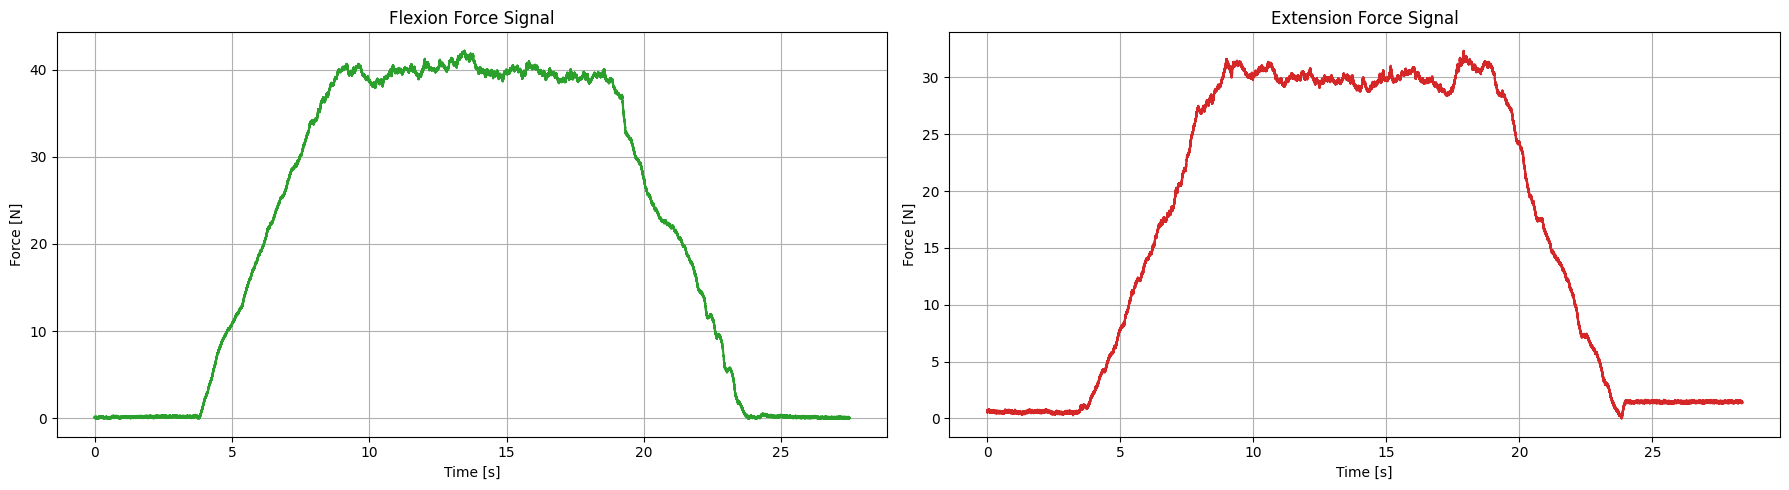

In [359]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].plot(time_fl, force_fl_absolute, color=fl_plot_color)
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Force [N]")
axes[0].set_title("Flexion Force Signal")
axes[0].grid(True)

axes[1].plot(time_ex, force_ex_absolute, color=ex_plot_color)
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Force [N]")
axes[1].set_title("Extension Force Signal")
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 1.3 Plot all EMG channels in mV over time

In [360]:
def plot_EMG_signals(df, is_flexion):
  time = np.arange(len(df)) / fsamp

  interspace = 5.0

  plot_color = fl_plot_color if is_flexion else ex_plot_color
  plot_title = "EMG Signals in Flexion Over Time" if is_flexion else "EMG Signals in Extension Over Time"

  columns = [col for col in df.columns if col.startswith("EMG")]
  plt.figure(figsize=(12, 20))

  for i, col in enumerate(columns):
      plt.plot(time, df[col] + i*interspace, color=plot_color)

  yticks = [i*interspace for i in range(len(columns))]
  plt.yticks(yticks, columns)

  plt.xlabel("Time [s]")
  plt.ylabel("EMG Channels [mV]")
  plt.title(plot_title)
  plt.grid(True)
  plt.tight_layout()
  plt.show()

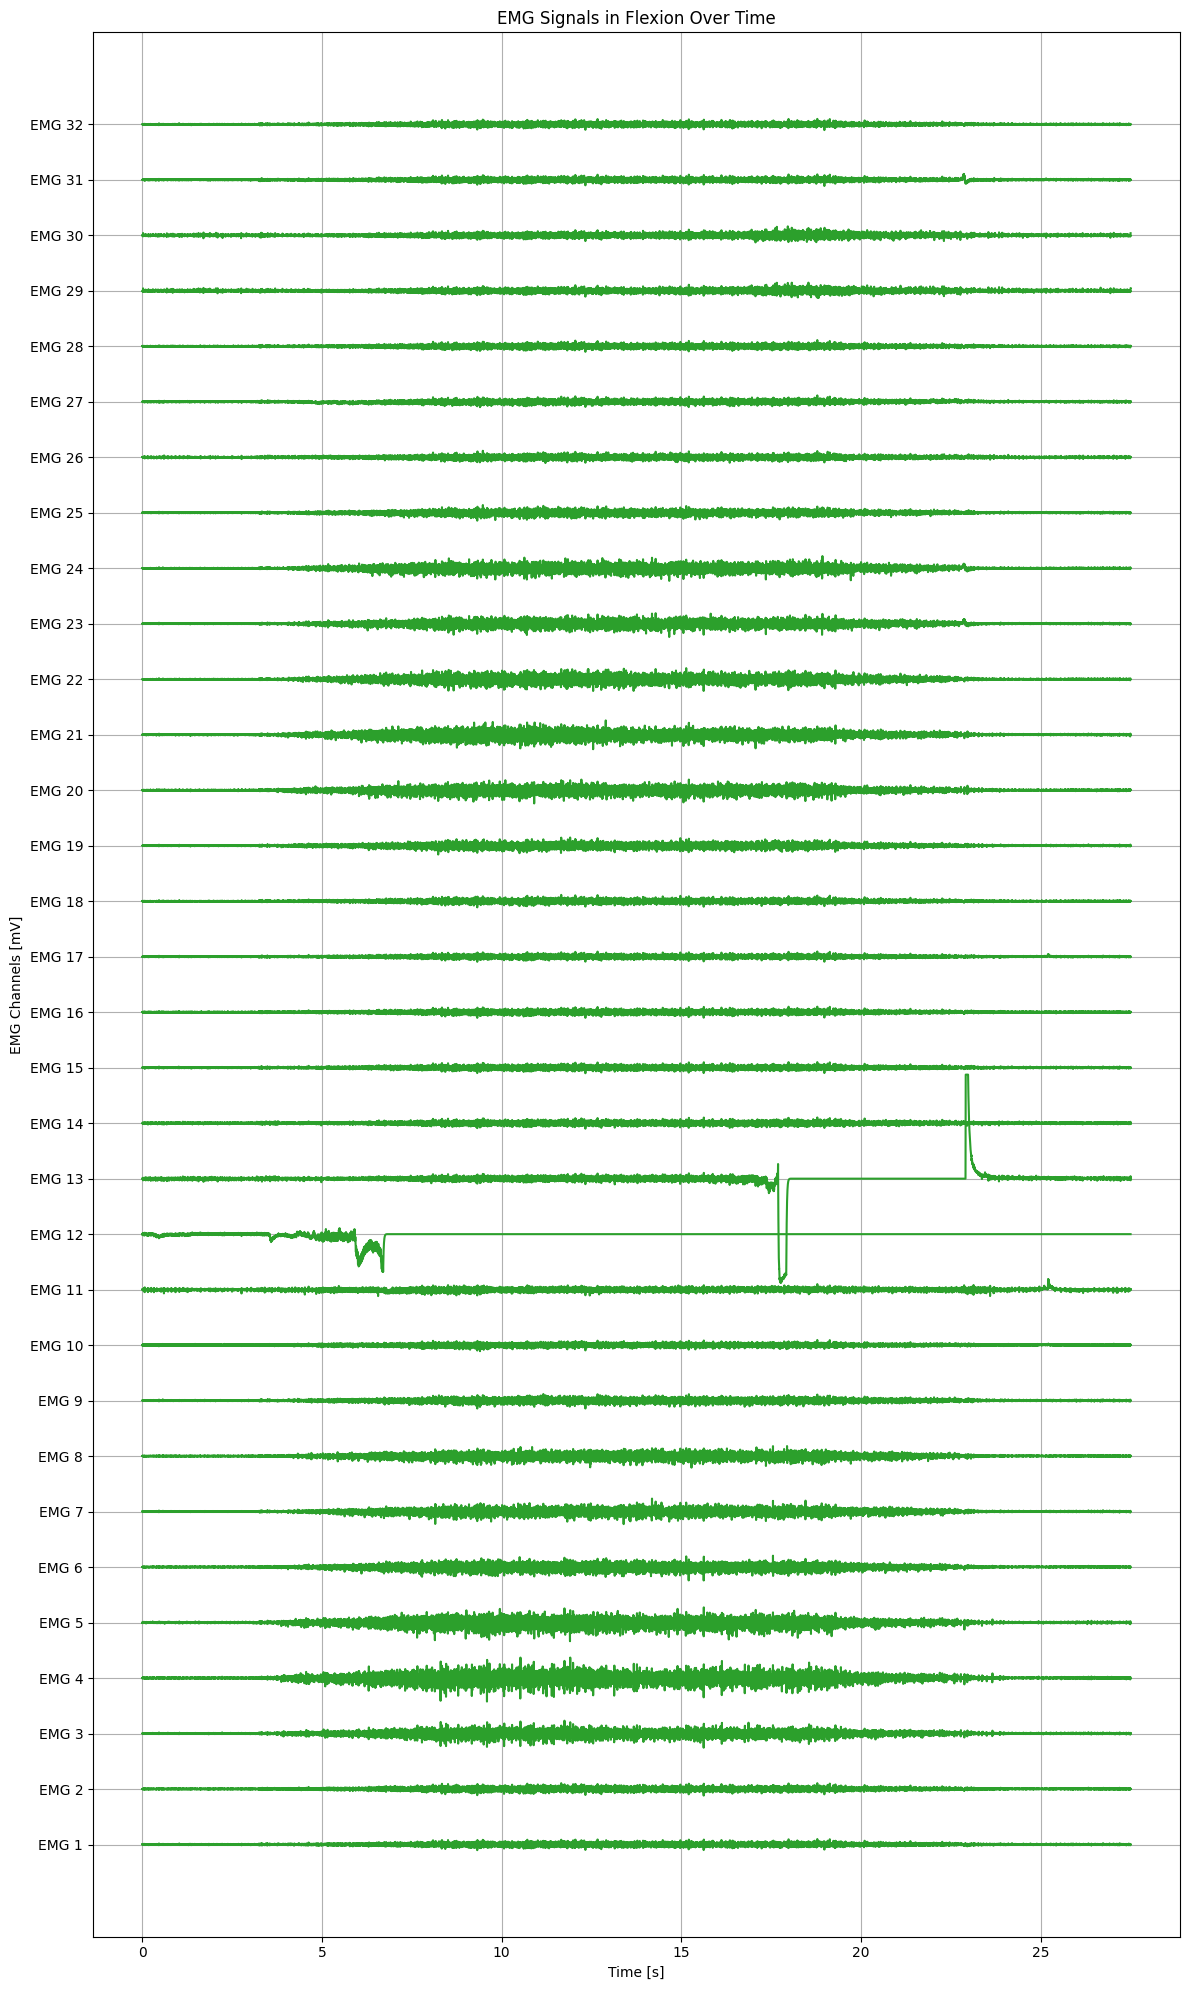

In [361]:
plot_EMG_signals(df_fl, True)

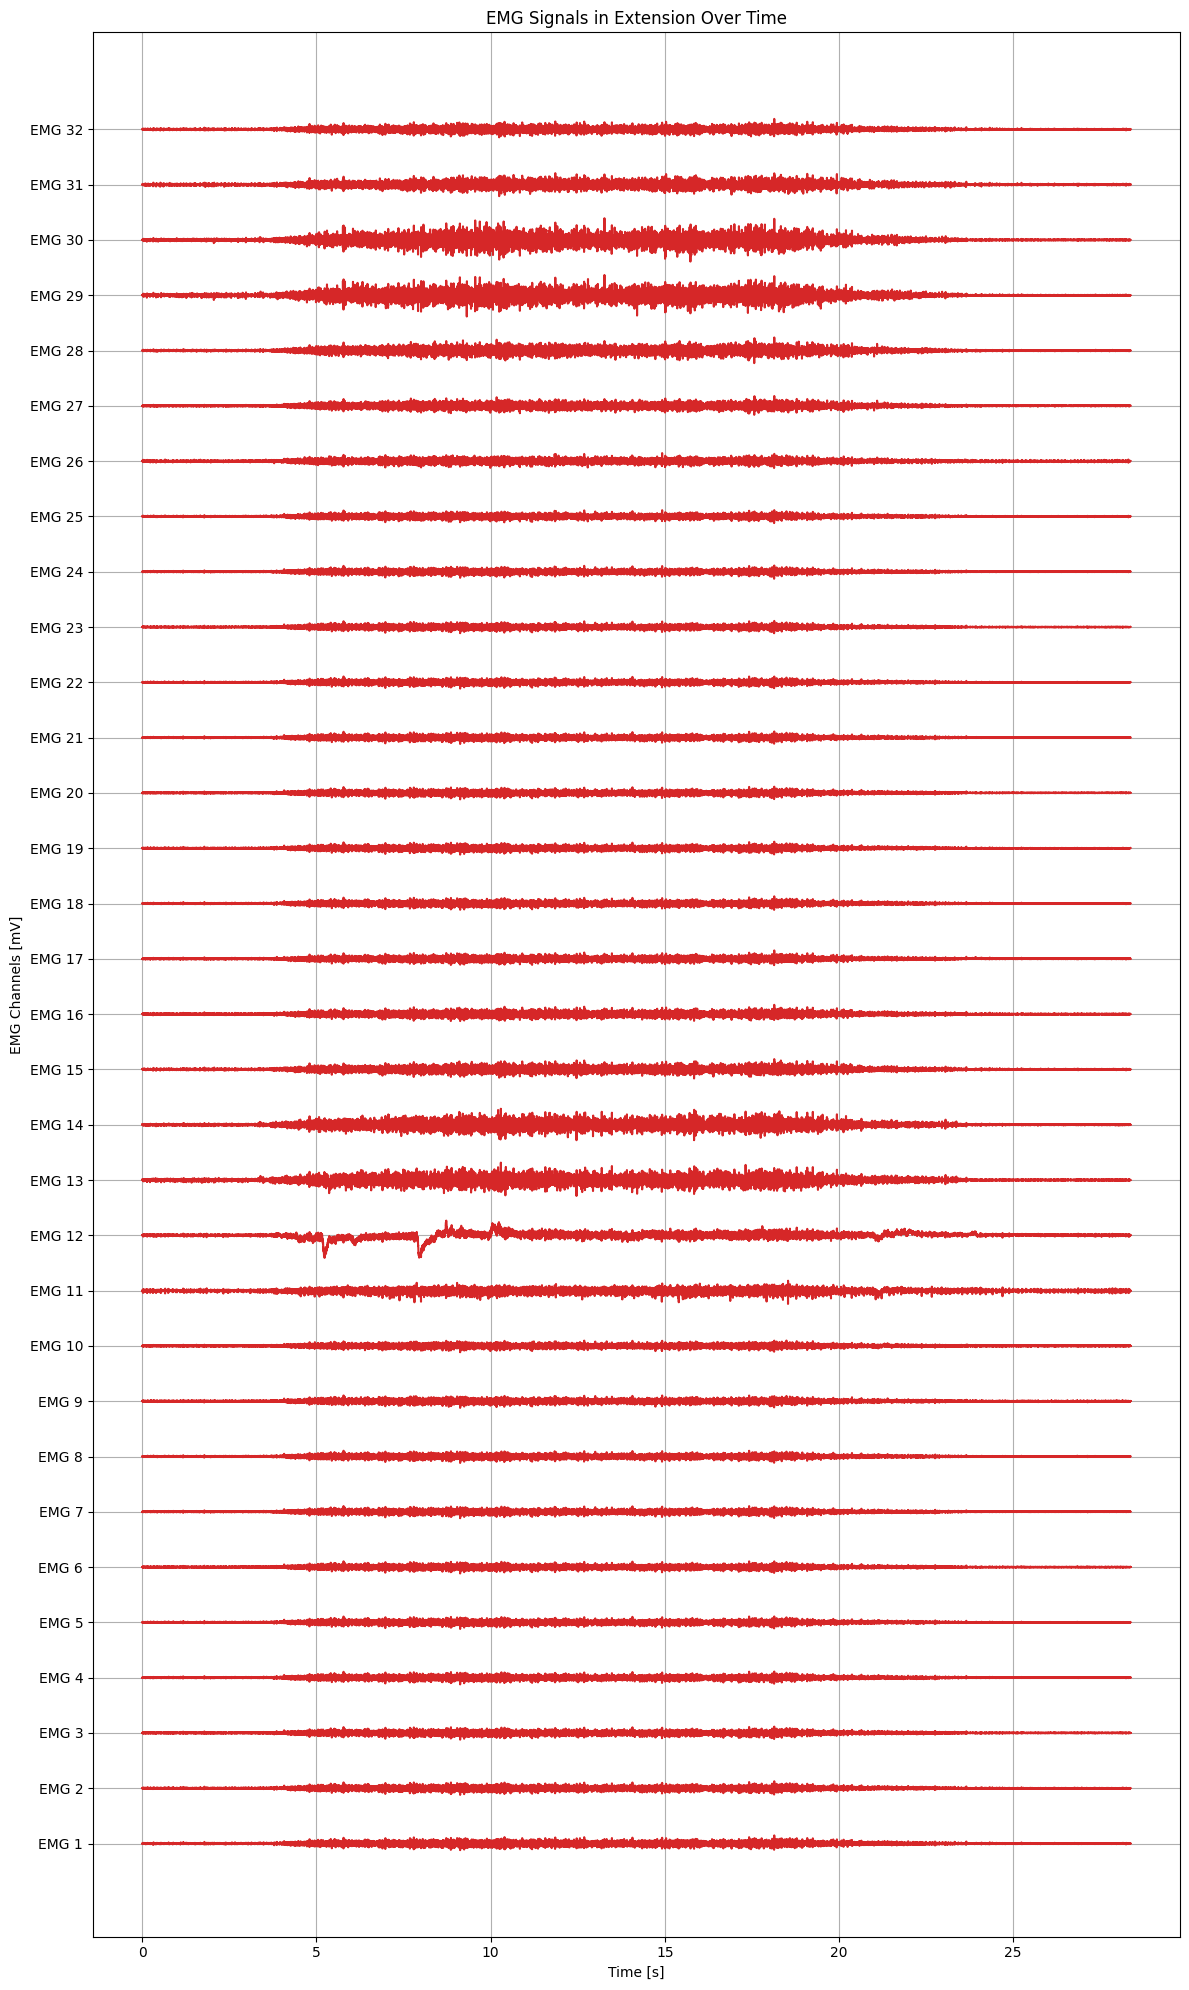

In [362]:
plot_EMG_signals(df_ex, False)

## 1.4 Delete the channels from the EMG_raw signals that show strange behavior

In [363]:
df_fl = df_fl.drop(columns=["EMG 12", "EMG 13"])
df_ex = df_ex.drop(columns=["EMG 12"])

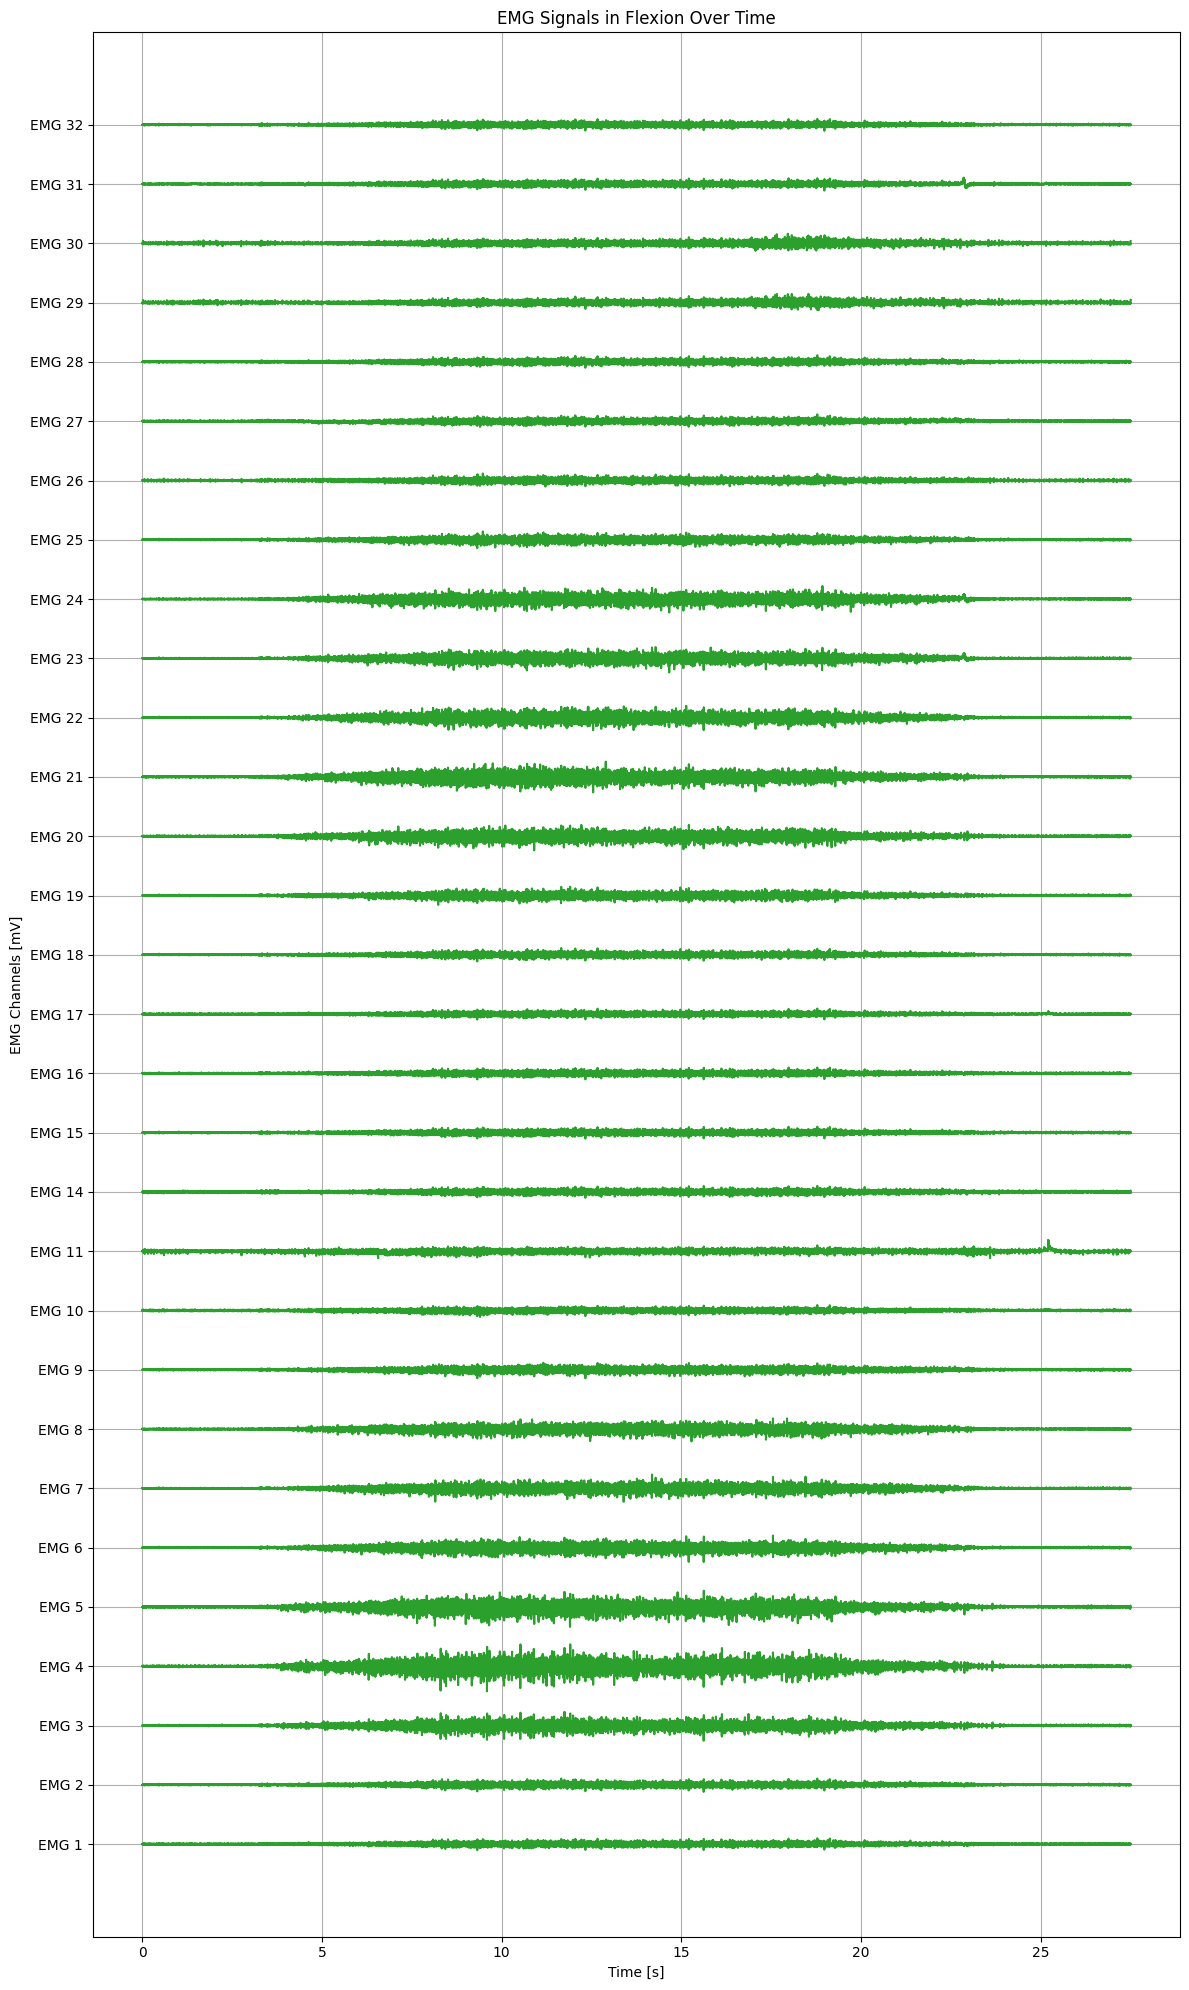

In [364]:
plot_EMG_signals(df_fl, True)

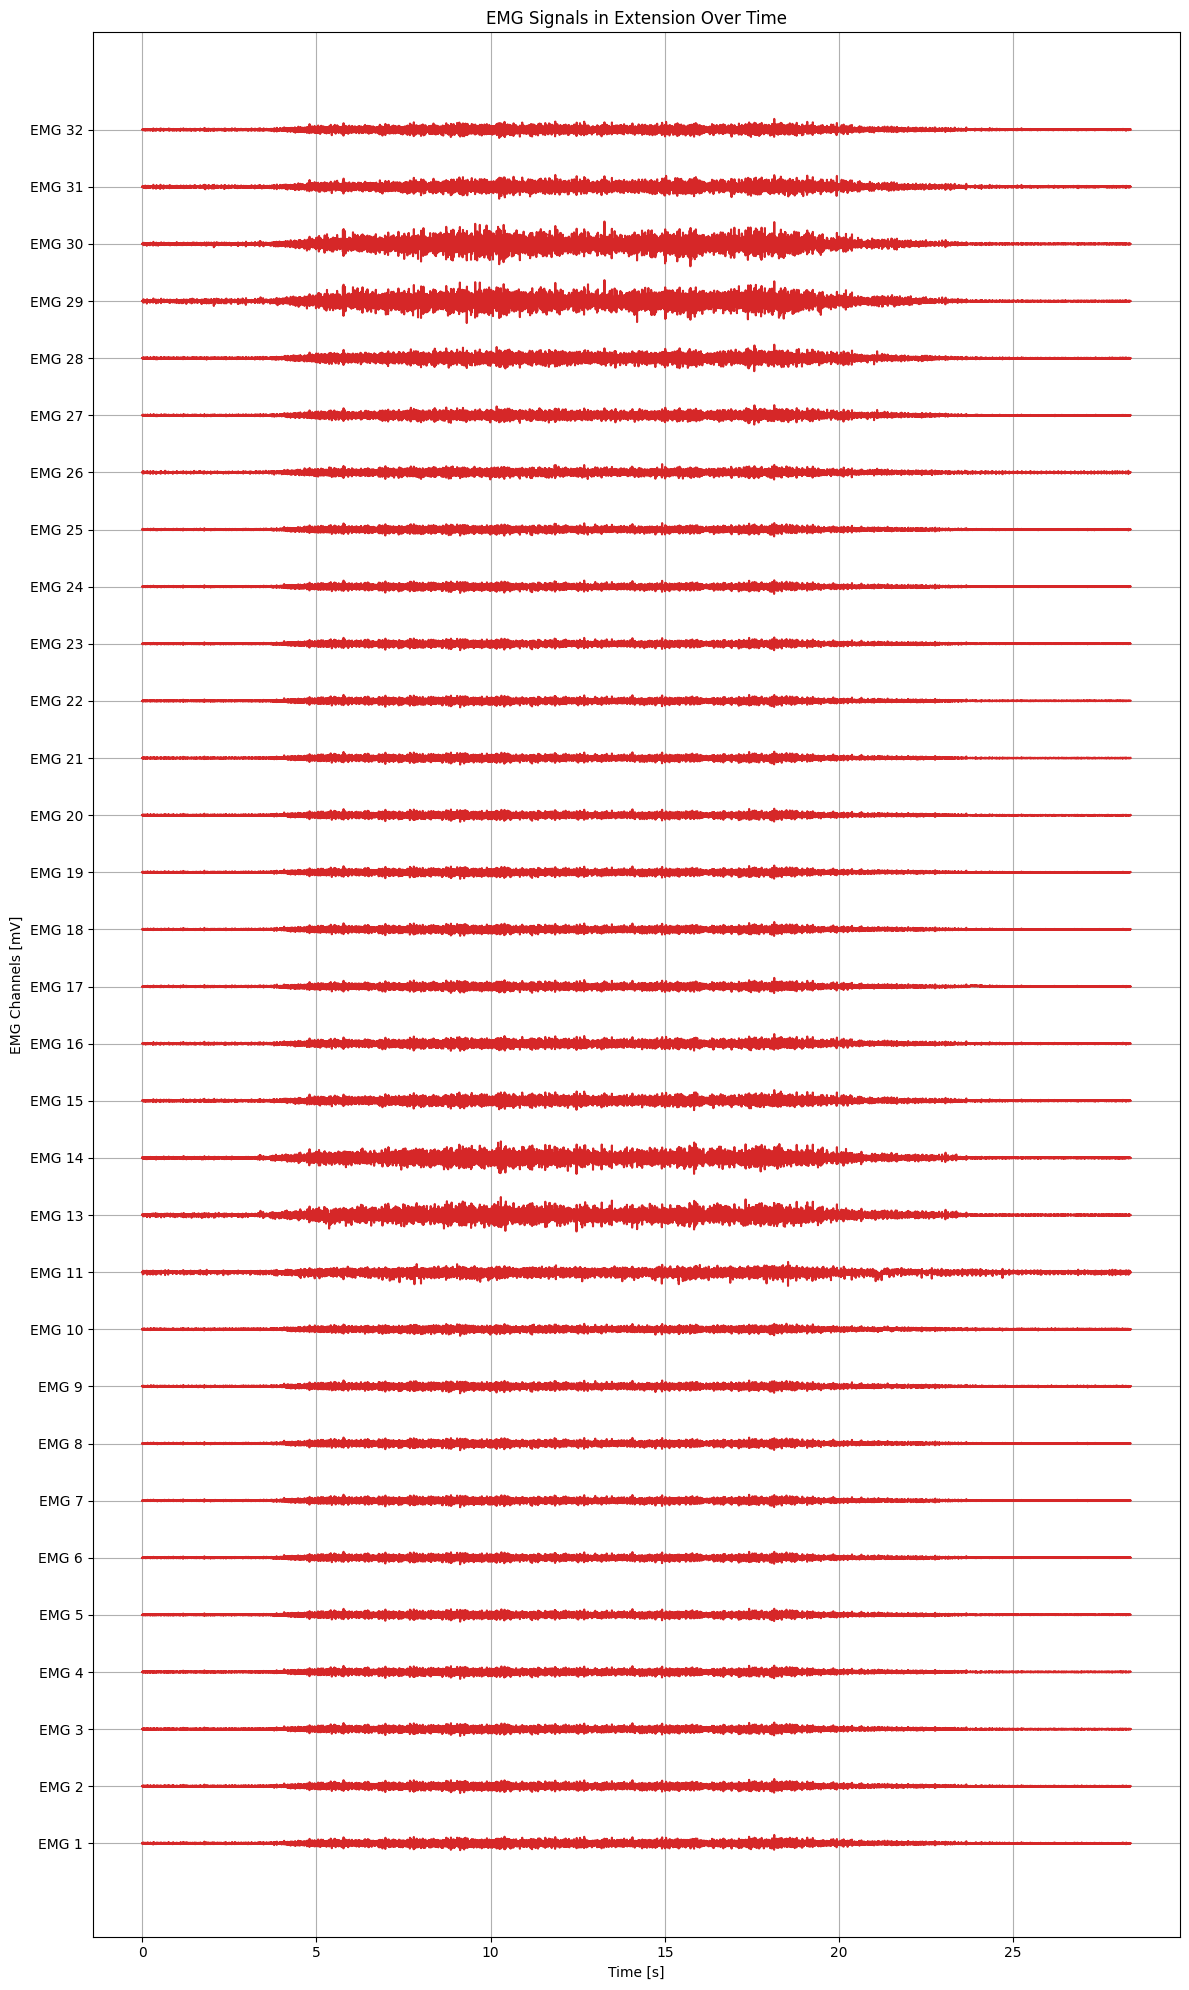

In [365]:
plot_EMG_signals(df_ex, False)

## 1.5 The EMG signals contain noise

### 1.5.1


In [366]:
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

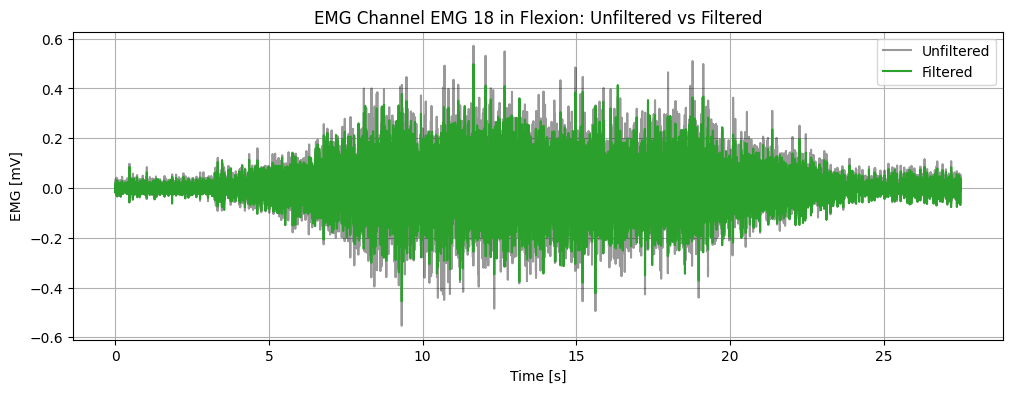

In [367]:
channel_fl = "EMG 18"
unfiltered = df_fl[channel_fl]
filtered_fl = apply_bandpass_filter(unfiltered, lowcut=50, highcut=450, fs=fsamp)

time = np.arange(len(unfiltered)) / fsamp

plt.figure(figsize=(12, 4))
plt.plot(time, unfiltered, label="Unfiltered", alpha=0.4, color="black")
plt.plot(time, filtered_fl, label="Filtered", color=fl_plot_color)
plt.xlabel("Time [s]")
plt.ylabel("EMG [mV]")
plt.title(f"EMG Channel {channel_fl} in Flexion: Unfiltered vs Filtered")
plt.legend()
plt.grid(True)
plt.show()

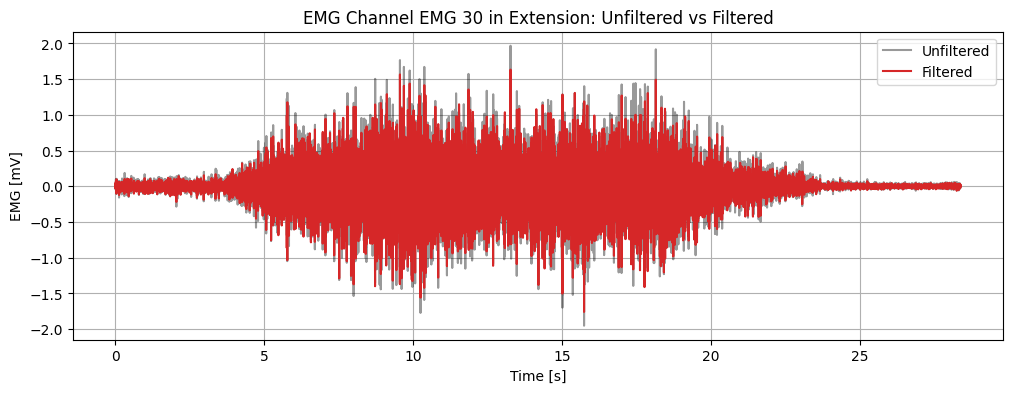

In [368]:
channel_ex = "EMG 30"
unfiltered = df_ex[channel_ex]
filtered_ex = apply_bandpass_filter(unfiltered, lowcut=50, highcut=450, fs=fsamp)

time = np.arange(len(unfiltered)) / fsamp

plt.figure(figsize=(12, 4))
plt.plot(time, unfiltered, label="Unfiltered", alpha=0.4, color="black")
plt.plot(time, filtered_ex, label="Filtered", color=ex_plot_color)
plt.xlabel("Time [s]")
plt.ylabel("EMG [mV]")
plt.title(f"EMG Channel {channel_ex} in Extension: Unfiltered vs Filtered")
plt.legend()
plt.grid(True)
plt.show()

### 1.5.2


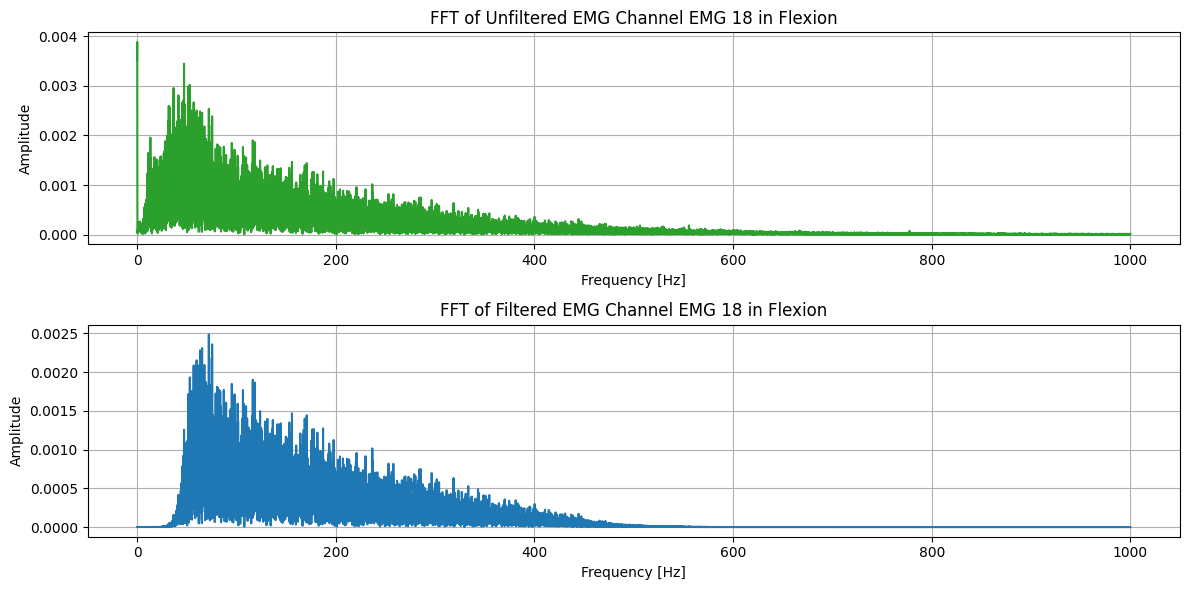

In [369]:
unfiltered = df_fl[channel_fl].values

N = len(unfiltered)
freq = np.fft.rfftfreq(N, 1/fsamp)
fft_unfiltered = np.abs(np.fft.rfft(unfiltered)) / N
fft_filtered = np.abs(np.fft.rfft(filtered_fl)) / N

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq, fft_unfiltered, color=fl_plot_color)
plt.title(f"FFT of Unfiltered EMG Channel {channel_fl} in Flexion")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(freq, fft_filtered, color='#1f77b4')
plt.title(f"FFT of Filtered EMG Channel {channel_fl} in Flexion")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

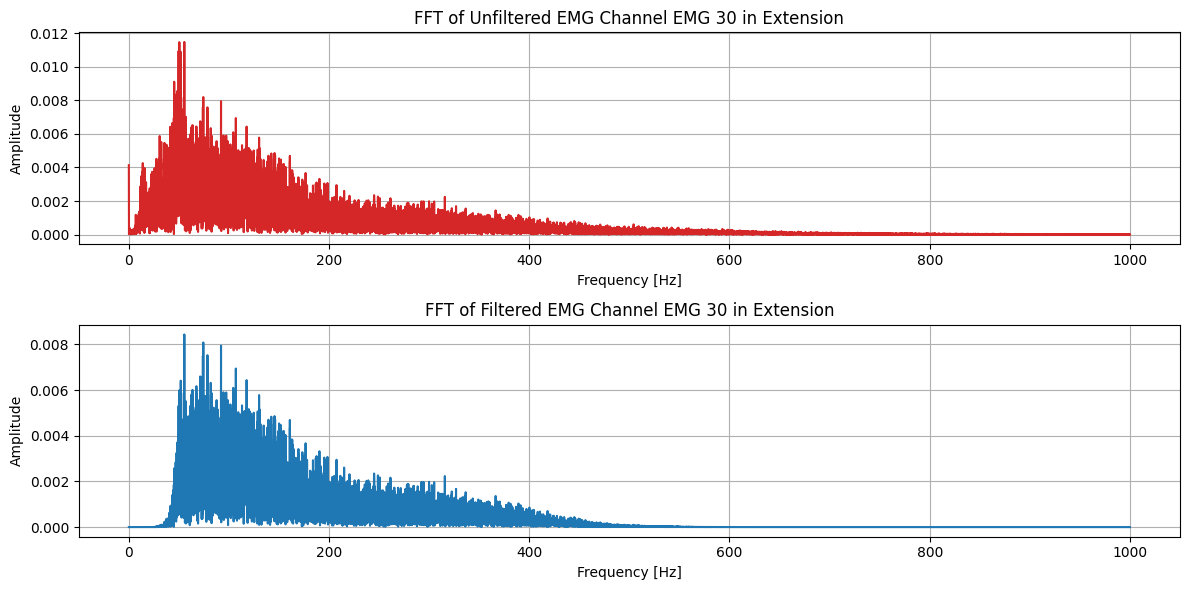

In [370]:
unfiltered = df_ex[channel_ex].values

N = len(unfiltered)
freq = np.fft.rfftfreq(N, 1/fsamp)
fft_unfiltered = np.abs(np.fft.rfft(unfiltered)) / N
fft_filtered = np.abs(np.fft.rfft(filtered_ex)) / N

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(freq, fft_unfiltered, color=ex_plot_color)
plt.title(f"FFT of Unfiltered EMG Channel {channel_ex} in Extension")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(freq, fft_filtered, color='#1f77b4')
plt.title(f"FFT of Filtered EMG Channel {channel_ex} in Extension")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

## 1.6 Plot an exemplary channel of your choice


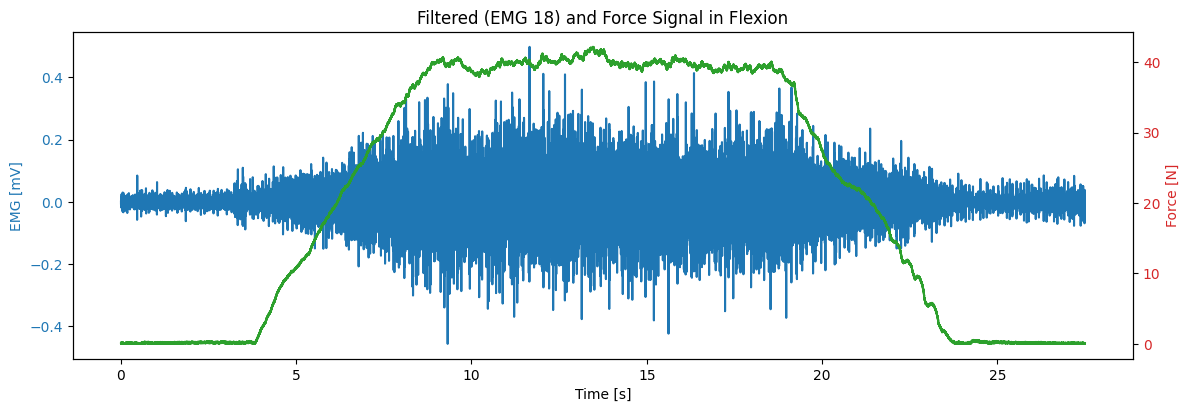

In [371]:
force_signal = np.abs(df_fl["force"].values)

time = np.arange(len(filtered_fl)) / fsamp

fig, ax1 = plt.subplots(figsize=(12, 4))

color_emg = 'tab:blue'
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("EMG [mV]", color=color_emg)
ax1.plot(time, filtered_fl, color=color_emg, label="Filtered EMG")
ax1.tick_params(axis='y', labelcolor=color_emg)

ax2 = ax1.twinx()
color_force = 'tab:red'
ax2.set_ylabel("Force [N]", color=color_force)
ax2.plot(time, force_signal, color=fl_plot_color, label="Force")
ax2.tick_params(axis='y', labelcolor=color_force)

fig.tight_layout()
plt.title(f"Filtered ({channel_fl}) and Force Signal in Flexion")
plt.show()

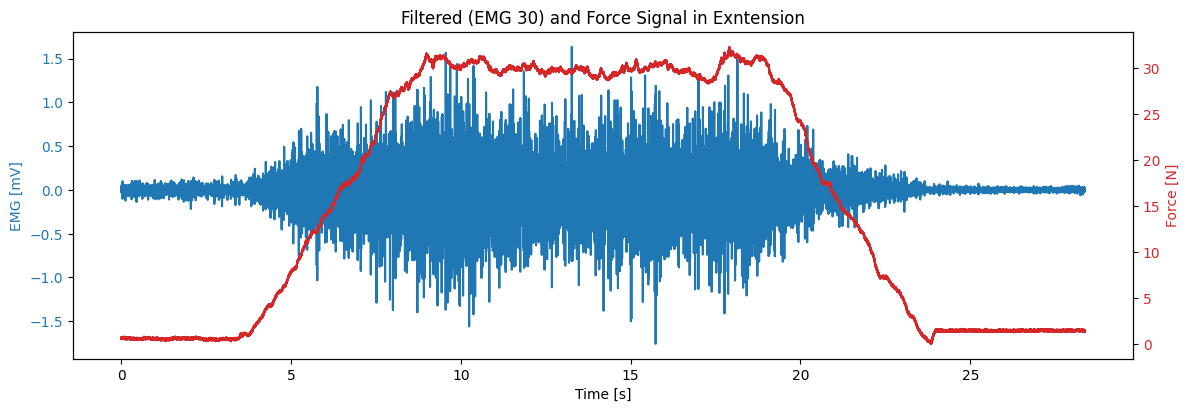

In [372]:
force_signal = np.abs(df_ex["force"].values)

time = np.arange(len(filtered_ex)) / fsamp

fig, ax1 = plt.subplots(figsize=(12, 4))

color_emg = 'tab:blue'
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("EMG [mV]", color=color_emg)
ax1.plot(time, filtered_ex, color=color_emg, label="Filtered EMG")
ax1.tick_params(axis='y', labelcolor=color_emg)

ax2 = ax1.twinx()
color_force = 'tab:red'
ax2.set_ylabel("Force [N]", color=color_force)
ax2.plot(time, force_signal, color=ex_plot_color, label="Force")
ax2.tick_params(axis='y', labelcolor=color_force)

fig.tight_layout()
plt.title(f"Filtered ({channel_ex}) and Force Signal in Exntension")
plt.show()

# Task 2. Force steadiness

In [373]:
def calculate_CV(df):
  force_signal = np.abs(df["force"].values)

  start_sec = 7
  end_sec = 19

  start_idx = int(start_sec * fsamp)
  end_idx = int(end_sec * fsamp)

  force_plateau = force_signal[start_idx:end_idx]


  mean_force = np.mean(force_plateau)
  std_force = np.std(force_plateau)

  cv = (std_force / mean_force) * 100
  return cv

In [374]:
CV_fl = calculate_CV(df_fl)
CV_ex = calculate_CV(df_ex)

print(f"Task 2.1: Wrist Flexion, CV = {CV_fl:.2f} %")
print(f"Task 2.1: Wrist Extension, CV = {CV_ex:.2f} %")

Task 2.1: Wrist Flexion, CV = 7.18 %
Task 2.1: Wrist Extension, CV = 7.61 %


# Task 3. Rate of force development

## 3.1


In [375]:
def calculate_RFD(force):
  window_ms = 1000
  window_samples = int(window_ms / 1000 * fsamp)
  rfd_list = []

  for start in range(0, len(force) - window_samples):
      end = start + window_samples
      delta_f = force[end] - force[start]
      delta_t = window_samples / fsamp
      rfd = delta_f / delta_t
      rfd_list.append(rfd)

  rfd_array = np.array(rfd_list)
  return rfd_array

In [376]:
rfd_fl = calculate_RFD(df_fl["force"].abs())
rfd_ex = calculate_RFD(df_ex["force"].abs())

print("Peak RFD in Flexion", np.max(rfd_fl), "N/s")
print("Mean RFD in Flexion", np.mean(rfd_fl), "N/s")

print("Peak RFD in Extension", np.max(rfd_ex), "N/s")
print("Mean RFD in Extension", np.mean(rfd_ex), "N/s")

Peak RFD in Flexion 9.993447 N/s
Mean RFD in Flexion -0.0014067717 N/s
Peak RFD in Extension 9.305279 N/s
Mean RFD in Extension 0.031273704 N/s


## 3.2

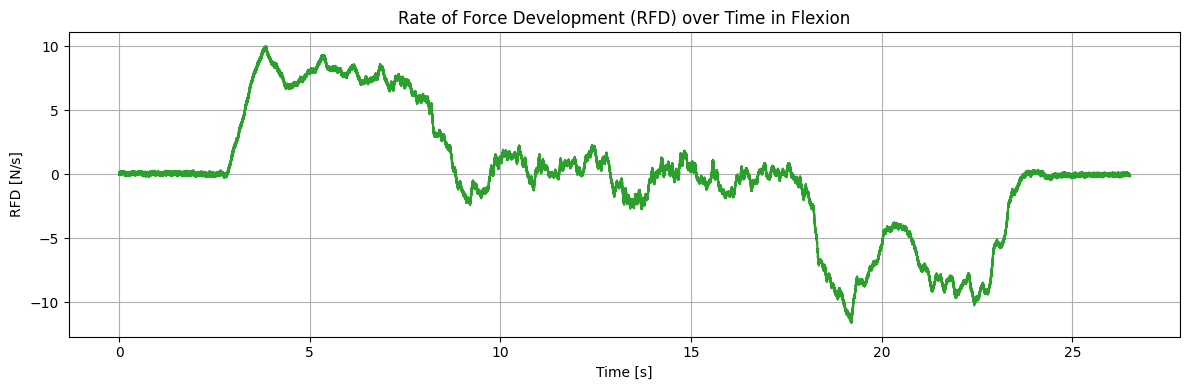

In [377]:
time_rfd = np.arange(rfd_fl.size) / fsamp

plt.figure(figsize=(12, 4))
plt.plot(time_rfd, rfd_fl, color=fl_plot_color)
plt.xlabel("Time [s]")
plt.ylabel("RFD [N/s]")
plt.title("Rate of Force Development (RFD) over Time in Flexion")
plt.grid(True)
plt.tight_layout()
plt.show()

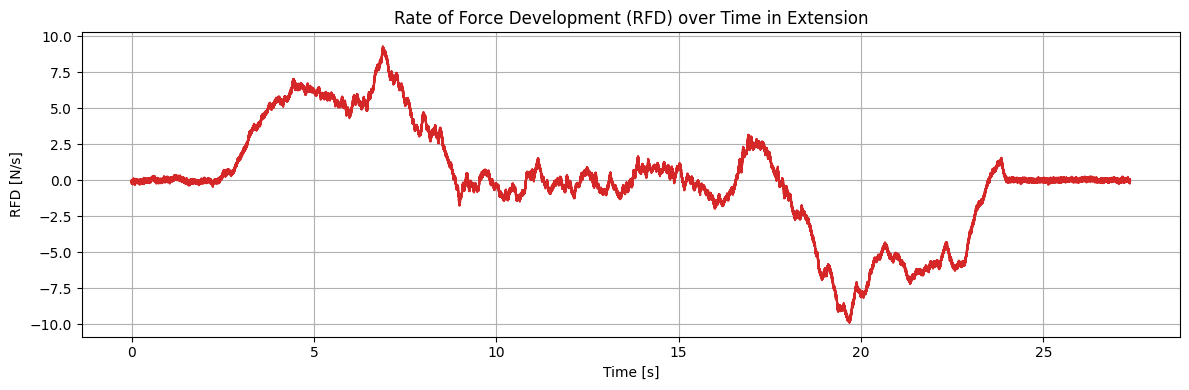

In [378]:
time_rfd = np.arange(rfd_ex.size) / fsamp

plt.figure(figsize=(12, 4))
plt.plot(time_rfd, rfd_ex, color=ex_plot_color)
plt.xlabel("Time [s]")
plt.ylabel("RFD [N/s]")
plt.title("Rate of Force Development (RFD) over Time in Extension")
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 4. Root-Mean-Square (RMS) of EMG

## 4.1

In [379]:
emg_columns = [col for col in df_fl.columns if col.startswith("EMG")]

emg_filtered_df = df_fl[emg_columns].copy()

for col in emg_columns:
    emg_filtered_df[col] = apply_bandpass_filter(
        df_fl[col].values, lowcut=50, highcut=450, fs=fsamp
    )

emg_filtered = emg_filtered_df

emg_avg_fl = emg_filtered.mean(axis=1).values
print(emg_avg_fl)

[ 0.00033964 -0.00583008 -0.00622202 ...  0.0213017   0.01571042
  0.01389028]


In [380]:
emg_columns = [col for col in df_ex.columns if col.startswith("EMG")]

emg_filtered_df = df_ex[emg_columns].copy()

for col in emg_columns:
    emg_filtered_df[col] = apply_bandpass_filter(
        df_ex[col].values, lowcut=50, highcut=450, fs=fsamp
    )

emg_filtered = emg_filtered_df

emg_avg_ex = emg_filtered.mean(axis=1).values
print(emg_avg_ex)

[3.65360739e-05 2.41193748e-03 1.10098912e-03 ... 2.86711508e-03
 3.19450267e-03 1.42915389e-03]


## 4.2


In [381]:
def moving_rms(signal, window_samples):
    squared = signal ** 2
    kernel = np.ones(window_samples) / window_samples
    rms = np.sqrt(np.convolve(squared, kernel, mode="same"))
    return rms

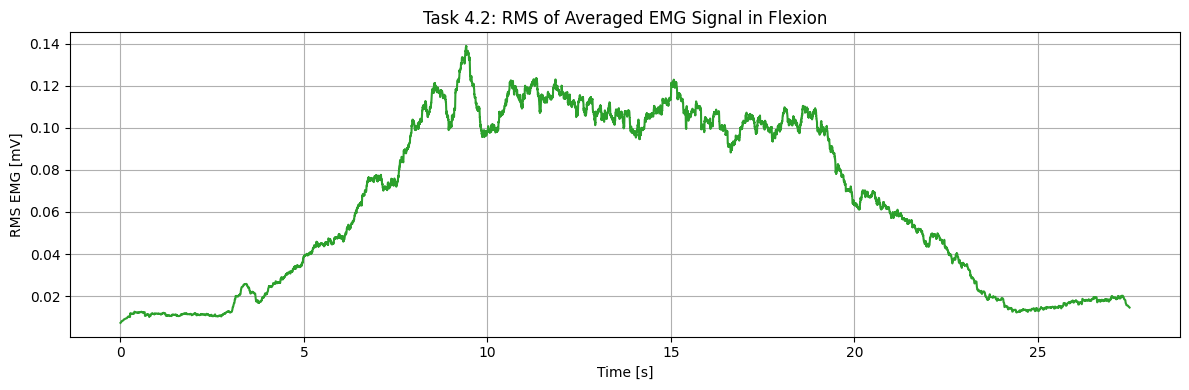

In [382]:
window_ms = 400
window_samples = int(window_ms / 1000 * fsamp)

rms_emg_fl = moving_rms(emg_avg_fl, window_samples)

time_rms = np.arange(len(rms_emg_fl)) / fsamp

plt.figure(figsize=(12, 4))
plt.plot(time_rms, rms_emg_fl, color=fl_plot_color)
plt.xlabel("Time [s]")
plt.ylabel("RMS EMG [mV]")
plt.title("Task 4.2: RMS of Averaged EMG Signal in Flexion")
plt.grid(True)
plt.tight_layout()
plt.show()

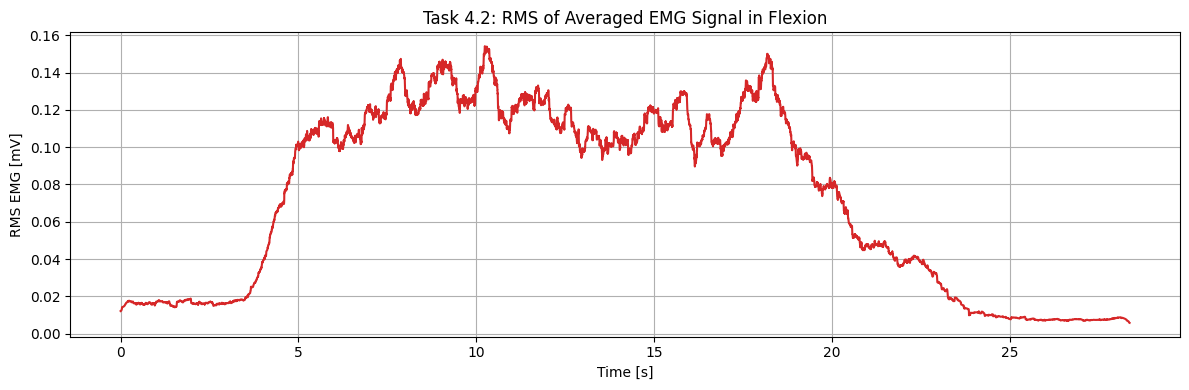

In [383]:
window_ms = 400
window_samples = int(window_ms / 1000 * fsamp)

rms_emg_ex = moving_rms(emg_avg_ex, window_samples)

time_rms = np.arange(len(rms_emg_ex)) / fsamp

plt.figure(figsize=(12, 4))
plt.plot(time_rms, rms_emg_ex, color=ex_plot_color)
plt.xlabel("Time [s]")
plt.ylabel("RMS EMG [mV]")
plt.title("Task 4.2: RMS of Averaged EMG Signal in Flexion")
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.3

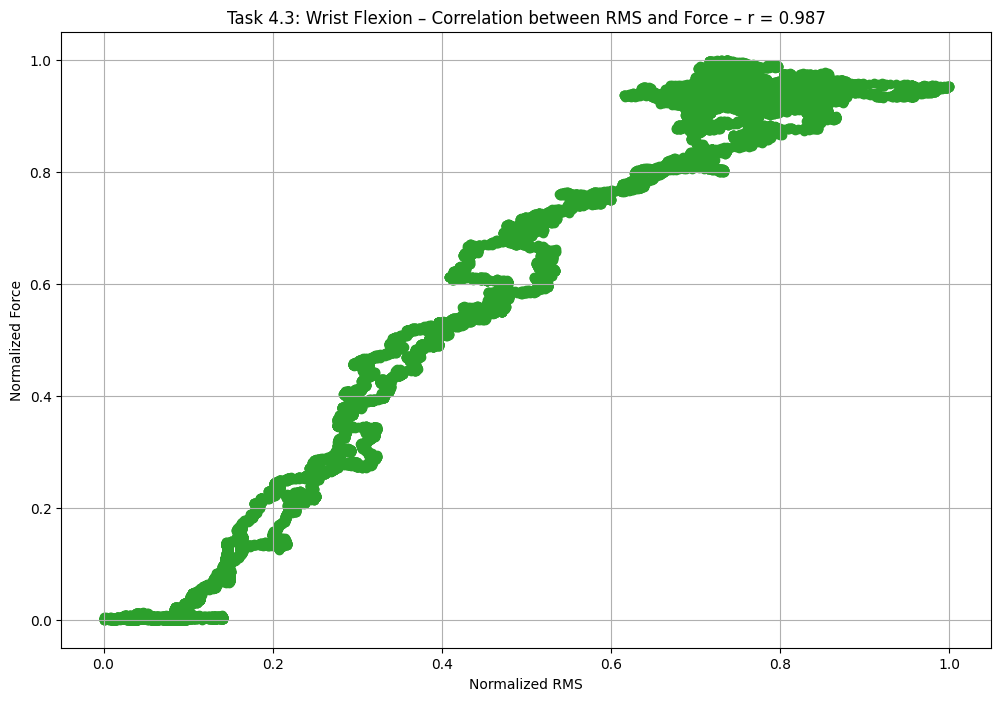

In [384]:
RMS = rms_emg_fl
force = df_fl["force"].abs()

RMS_norm_fl = (RMS - np.min(RMS)) / (np.max(RMS) - np.min(RMS))
Force_norm_fl = (force - np.min(force)) / (np.max(force) - np.min(force))

r = np.corrcoef(RMS_norm_fl, Force_norm_fl)[0, 1]

plt.figure(figsize=(12, 8))
plt.scatter(RMS_norm_fl, Force_norm_fl, color=fl_plot_color)
plt.xlabel("Normalized RMS")
plt.ylabel("Normalized Force")
plt.title(f"Task 4.3: Wrist Flexion – Correlation between RMS and Force – r = {r:.3f}")
plt.grid(True)
plt.show()

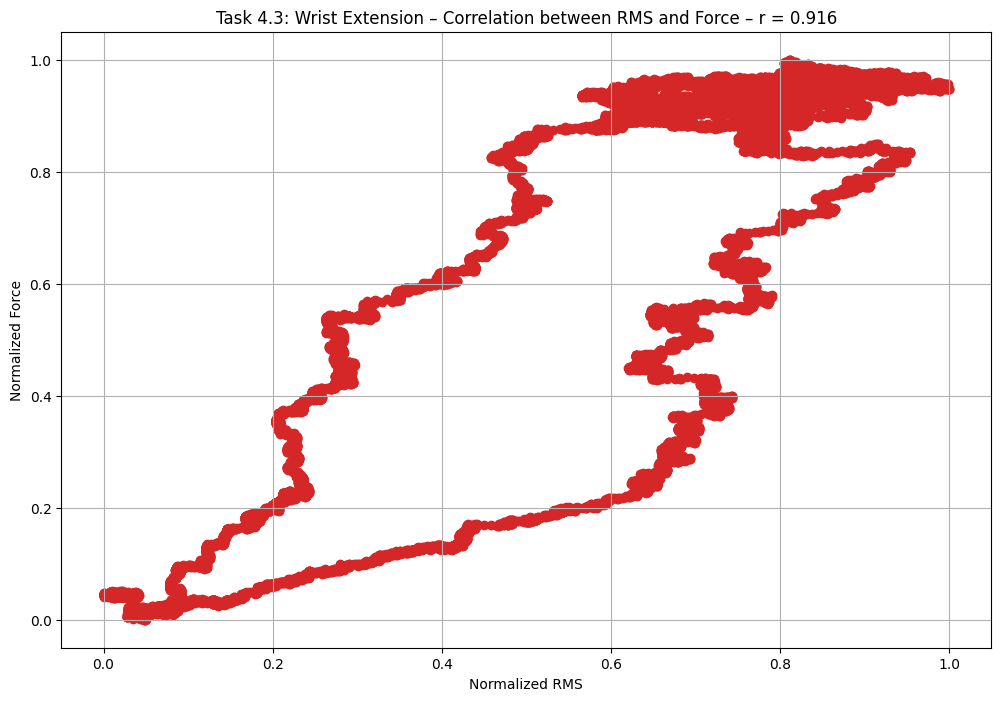

In [385]:
RMS = rms_emg_ex
force = df_ex["force"].abs()

RMS_norm_ex = (RMS - np.min(RMS)) / (np.max(RMS) - np.min(RMS))
Force_norm_ex = (force - np.min(force)) / (np.max(force) - np.min(force))

r = np.corrcoef(RMS_norm_ex, Force_norm_ex)[0, 1]

plt.figure(figsize=(12, 8))
plt.scatter(RMS_norm_ex, Force_norm_ex, color=ex_plot_color)
plt.xlabel("Normalized RMS")
plt.ylabel("Normalized Force")
plt.title(f"Task 4.3: Wrist Extension – Correlation between RMS and Force – r = {r:.3f}")
plt.grid(True)
plt.show()